In [50]:
# Question 1: 

def matrix_operations(n,m,k):
    multiplications= n*m*k
    additions= n*m*(k-1)
    return multiplications, additions

n = 3 
k = 4  
m = 5 
mults, adds = matrix_operations(n, k, m)

# when we multiply n*k ans k*m matrices we get a n*m matrix:
# Also to get the value of 1 unit say (n-2,m-3)th block in multiplyed matrix we need to do k multiplications and k-1 additions to sum those products.
# hence total multiplications is (n*m*k) and additions is (n*m*(k-1)) for all blocks altogether.

print("Multiplications: " + str(mults))
print("Additions: "+ str(adds))

Multiplications: 60
Additions: 48


In [59]:
# question 2: 

import random
import time
import numpy as np

n, k, m = 3, 4, 5

A_list = [[random.random() for i in range(k)] for j in range(n)]
B_list = [[random.random() for i in range(m)] for j in range(k)]
A_np = np.array(A_list)
B_np = np.array(B_list)

# Using list of lists
start_list = time.time()
C_list = [[sum(A_list[i][p] * B_list[p][j] for p in range(k)) for j in range(m)] for i in range(n)]
end_list = time.time()

# Using NumPy
start_np = time.time()
C_np = np.dot(A_np, B_np)
end_np = time.time()

print(f"List-of-lists time: {end_list - start_list:.6f} seconds")
print(f"NumPy time:         {end_np - start_np:.6f} seconds")
print("Numpy is faster")


# reason:
#NumPy operations are implemented in C and operate on whole arrays at once, 
#instead of looping in Python. This removes the overhead of Python’s slow for loops.




List-of-lists time: 0.000266 seconds
NumPy time:         0.000105 seconds
Numpy is faster


# question 3:

Finding the median by repeatedly scanning for the next largest element takes O(n²) time, which is slow.
Better Method: To sort the list first in O(n log n) and pick the middle element, or use Quickselect to get the median in O(n) on average.

In [1]:
# Question 3:

import numpy as np
import time
import random

# O(n^2) repeated pass method
def median_repeated_pass(arr):
    arr_copy = arr[:]
    n = len(arr_copy)
    median_index = n // 2
    for _ in range(median_index):
        max_val = max(arr_copy)
        arr_copy.remove(max_val)
    return max(arr_copy)

# Sorting method O(nlogn)
def median_sort(arr):
    arr_sorted = sorted(arr)
    n = len(arr_sorted)
    mid = n // 2
    if n % 2 == 0:
        return (arr_sorted[mid - 1] + arr_sorted[mid]) / 2
    else:
        return arr_sorted[mid]

# data
arr = [random.random() for i in range(5000)]
arr_np = np.array(arr)

# repeated-pass method
start = time.time()
median_rp = median_repeated_pass(arr)
time_rp = time.time() - start

# sorting method
start = time.time()
median_s = median_sort(arr)
time_s = time.time() - start

print(f"Repeated-pass median: {median_rp}, Time: {time_rp:.5f} s")
print(f"Sorting median:       {median_s}, Time: {time_s:.5f} s")
print("Sorting method > Repeated-pass median")

Repeated-pass median: 0.49724466122241995, Time: 0.27003 s
Sorting median:       0.4973053889225423, Time: 0.00148 s
Sorting method > Repeated-pass median


In [71]:
Question 4:

import math

def func(x, y):
    return x**2*y + y**3*math.sin(x)

def gradient(x,y):
    df_dx = 2*x*y + (y**3)*math.cos(x)
    df_dy = x**2 + 3*(y**2)*math.sin(x)
    return df_dx, df_dy

x =2.0
y =1.5
df_dx, df_dy = gradient(x,y)

print(f"f({x}, {y}) = {func(x, y):.5f}")
print(f"∂f/∂x at ({x}, {y}) = {df_dx:.5f}")
print(f"∂f/∂y at ({x}, {y}) = {df_dy:.5f}")
print(f"gradient of f(x, y) is = ({df_dx:.5f}, {df_dy:.5f})")

f(2.0, 1.5) = 9.06888
∂f/∂x at (2.0, 1.5) = 4.59550
∂f/∂y at (2.0, 1.5) = 10.13776
gradient of f(x, y) is = (4.59550, 10.13776)


In [ ]:
import sys
print(sys.executable)

!C:\Python313\python.exe -m pip install --upgrade "jax[cpu]"

In [2]:
# question 5:

import math
import random
import jax
import jax.numpy as jnp
print("JAX version:", jax.__version__)

def func(x, y):
    return x**2*y + y**3*math.sin(x)

def grad(x, y):
    df_dx = 2 *x*y + (y**3)*math.cos(x)
    df_dy = x**2 + 3*(y**2)*math.sin(x)
    return df_dx, df_dy

def f_jax(vars):
    x, y = vars
    return x**2*y + y**3*jnp.sin(x)


grad_jax = jax.grad(f_jax)

for i in range(5):
    x_val = random.uniform(-10,10)
    y_val = random.uniform(-10,10)

    grad_a = grad(x_val, y_val)
    grad_j = grad_jax(jnp.array([x_val, y_val]))

    print(f"x={x_val:.2f}, y={y_val:.2f}")
    print(f"Analytical gradient: {grad_a}")
    print(f"JAX gradient:        {tuple(float(v) for v in grad_j)}")
    print()

JAX version: 0.7.0
x=1.02, y=-2.49
Analytical gradient: (-13.205219804852891, 16.908860232358474)
JAX gradient:        (-13.205219268798828, 16.908859252929688)

x=3.38, y=7.10
Analytical gradient: (-299.23994642233953, -24.359745101237245)
JAX gradient:        (-299.2398986816406, -24.359752655029297)

x=3.26, y=-4.27
Analytical gradient: (49.62020665877209, 4.1020526959577435)
JAX gradient:        (49.620208740234375, 4.102054595947266)

x=9.77, y=-3.07
Analytical gradient: (-32.80155670768619, 85.89853351328233)
JAX gradient:        (-32.80154800415039, 85.8985366821289)

x=-1.83, y=2.03
Analytical gradient: (-9.550747726626467, -8.588268428409233)
JAX gradient:        (-9.550747871398926, -8.58827018737793)



In [22]:
!C:\Python313\python.exe -m pip install sympy


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [80]:
# question 6:

import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3*sp.sin(x)

#partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Function:", f)
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)

# gradient vector
grad = sp.Matrix([df_dx, df_dy])
print("Gradient vector =", grad)


Function: x**2*y + y**3*sin(x)
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)
Gradient vector = Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])


In [16]:
# question 7:

data = {
    2022: {
        "Branch 1": [
            {"Roll Number": 1, "Name": "Suyog", "Marks": {"Maths": 100, "English": 70}},
            {"Roll Number": 2, "Name": "Kunal", "Marks": {"Maths": 85, "English": 90}}
        ],
        "Branch 2": [
            {"Roll Number": 3, "Name": "Atharva", "Marks": {"Maths": 95, "English": 88}},
            {"Roll Number": 4, "Name": "Jainil", "Marks": {"Maths": 98, "English": 75}}
        ]
    },
    2023: {
        "Branch 1": [
            {"Roll Number": 5, "Name": "Suteekhsna", "Marks": {"Maths": 78, "English": 82}}
        ],
        "Branch 2": [
            {"Roll Number": 6, "Name": "Pawan", "Marks": {"Maths": 92, "English": 85}}
        ]
    },
    2024: {
        "Branch 1": [
            {"Roll Number": 7, "Name": "Manas", "Marks": {"Maths": 35, "English": 100}}
        ],
        "Branch 2": [
            {"Roll Number": 8, "Name": "Manas_2", "Marks": {"Maths": 100, "English": 35}}
        ]
    },
    2025: {
        "Branch 1": [
            {"Roll Number": 9, "Name": "Tejas", "Marks": {"Maths": 78, "English": 82}}
        ],
        "Branch 2": [
            {"Roll Number": 10, "Name": "Murli", "Marks": {"Maths": 50, "English": 69}}
        ]
    }
}

from pprint import pprint
pprint(data)

{2022: {'Branch 1': [{'Marks': {'English': 70, 'Maths': 100},
                      'Name': 'Suyog',
                      'Roll Number': 1},
                     {'Marks': {'English': 90, 'Maths': 85},
                      'Name': 'Kunal',
                      'Roll Number': 2}],
        'Branch 2': [{'Marks': {'English': 88, 'Maths': 95},
                      'Name': 'Atharva',
                      'Roll Number': 3},
                     {'Marks': {'English': 75, 'Maths': 98},
                      'Name': 'Jainil',
                      'Roll Number': 4}]},
 2023: {'Branch 1': [{'Marks': {'English': 82, 'Maths': 78},
                      'Name': 'Suteekhsna',
                      'Roll Number': 5}],
        'Branch 2': [{'Marks': {'English': 85, 'Maths': 92},
                      'Name': 'Pawan',
                      'Roll Number': 6}]},
 2024: {'Branch 1': [{'Marks': {'English': 100, 'Maths': 35},
                      'Name': 'Manas',
                      'Roll Number': 7

In [20]:
# question 8:

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  

    def __repr__(self):
        return f"Roll: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch: {self.name}, Students: {self.students}"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year: {self.year}, Branches: {self.branches}"


class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database: {self.years}"


db = Database()

year_2022 = Year(2022)
branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "Suyog", {"Maths": 100, "English": 70}))
branch1_2022.add_student(Student(2, "Kunal", {"Maths": 85, "English": 90}))

branch2_2022 = Branch("Branch 2")
branch2_2022.add_student(Student(3, "Atharva", {"Maths": 95, "English": 88}))
branch2_2022.add_student(Student(4, "Jainil", {"Maths": 98, "English": 75}))

year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)
db.add_year(year_2022)

year_2023 = Year(2023)
branch1_2023 = Branch("Branch 1")
branch1_2023.add_student(Student(5, "Suteekhsna", {"Maths": 78, "English": 82}))

branch2_2023 = Branch("Branch 2")
branch2_2023.add_student(Student(6, "Pawan", {"Maths": 92, "English": 85}))

year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)
db.add_year(year_2023)

year_2024 = Year(2024)
branch1_2024 = Branch("Branch 1")
branch1_2024.add_student(Student(7, "Manas", {"Maths": 35, "English": 100}))

branch2_2024 = Branch("Branch 2")
branch2_2024.add_student(Student(8, "Manas_2", {"Maths": 100, "English": 35}))

year_2024.add_branch(branch1_2024)
year_2024.add_branch(branch2_2024)
db.add_year(year_2024)

year_2025 = Year(2025)
branch1_2025 = Branch("Branch 1")
branch1_2025.add_student(Student(9, "Tejas", {"Maths": 78, "English": 82}))

branch2_2025 = Branch("Branch 2")
branch2_2025.add_student(Student(10, "Murli", {"Maths": 50, "English": 69}))

year_2025.add_branch(branch1_2025)
year_2025.add_branch(branch2_2025)
db.add_year(year_2025)

for year in db.years:
    print(f"Year: {year.year}")
    for branch in year.branches:
        print(f"  {branch.name}:")
        for student in branch.students:
            print(f"    Roll Number: {student.roll_number}, Name: {student.name}")
            for subject, marks in student.marks.items():
                print(f"      {subject}: {marks}")


Year: 2022
  Branch 1:
    Roll Number: 1, Name: Suyog
      Maths: 100
      English: 70
    Roll Number: 2, Name: Kunal
      Maths: 85
      English: 90
  Branch 2:
    Roll Number: 3, Name: Atharva
      Maths: 95
      English: 88
    Roll Number: 4, Name: Jainil
      Maths: 98
      English: 75
Year: 2023
  Branch 1:
    Roll Number: 5, Name: Suteekhsna
      Maths: 78
      English: 82
  Branch 2:
    Roll Number: 6, Name: Pawan
      Maths: 92
      English: 85
Year: 2024
  Branch 1:
    Roll Number: 7, Name: Manas
      Maths: 35
      English: 100
  Branch 2:
    Roll Number: 8, Name: Manas_2
      Maths: 100
      English: 35
Year: 2025
  Branch 1:
    Roll Number: 9, Name: Tejas
      Maths: 78
      English: 82
  Branch 2:
    Roll Number: 10, Name: Murli
      Maths: 50
      English: 69


In [21]:
!C:\Python313\python.exe -m pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


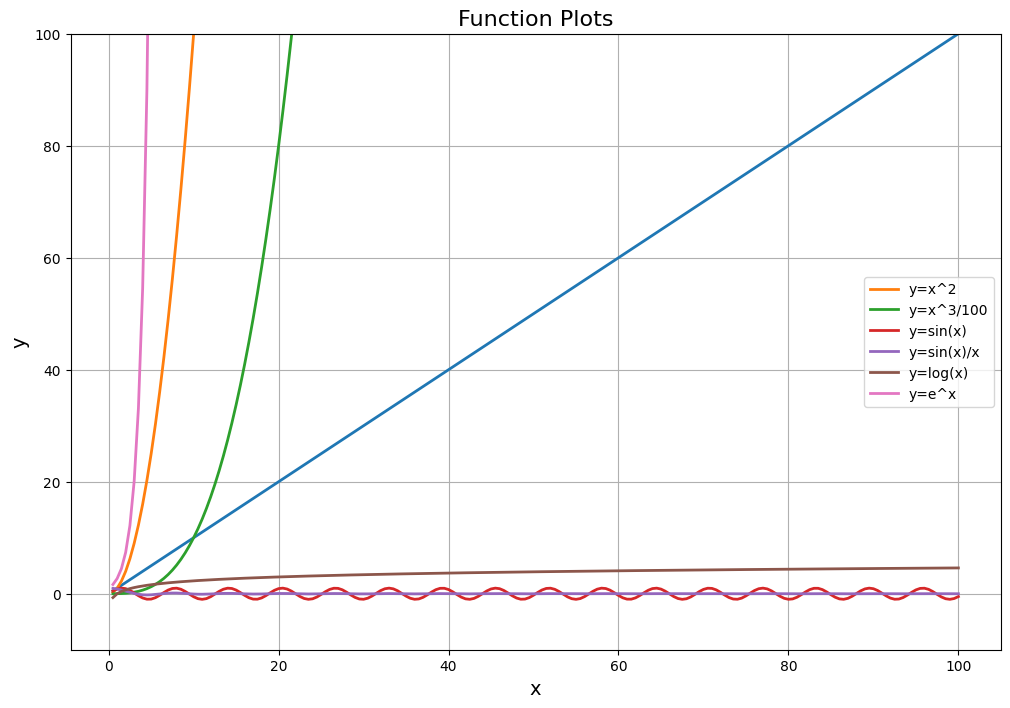

In [4]:
#question 9

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.5, 100.5, 0.5)  

y1 = x
y2 = x**2
y3 = x**3/100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)        
y7 = np.exp(x)        

plt.figure(figsize=(12, 8))

plt.plot(x,y1,linewidth=2)
plt.plot(x,y2, label=r"y=x^2", linewidth=2)
plt.plot(x,y3, label=r"y=x^3/100", linewidth=2)
plt.plot(x,y4, label=r"y=sin(x)", linewidth=2)
plt.plot(x,y5, label=r"y=sin(x)/x", linewidth=2)
plt.plot(x,y6, label=r"y=log(x)", linewidth=2)
plt.plot(x,y7, label=r"y=e^x", linewidth=2)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Function Plots", fontsize=16)
plt.legend(fontsize=10)
plt.grid(True)
plt.ylim(-10, 100)  
plt.show()

In [41]:
!C:\Python313\python.exe -m pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 14.5 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/11.0 MB 16.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 13.7 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 12.0 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [8]:
# question 10:

import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=["a","b","c","d","e"])
print("DataFrame:\n", df)

col_std = df.std()
highest_std= col_std.idxmax()

row_mean = df.mean(axis=1)
lowest_mean_row_index = row_mean.idxmin()
lowest_mean_row = df.loc[lowest_mean_row_index]


print("\nColumn with highest std deviation:", highest_std)
print("\nRow with lowest mean (index={}):\n".format(lowest_mean_row_index), lowest_mean_row)


DataFrame:
            a         b         c         d         e
0   1.033984  1.208973  1.546624  1.685723  1.240650
1   1.819864  1.375174  1.315120  1.500415  1.912888
2   1.300195  1.384432  1.389535  1.833065  1.274829
3   1.633840  1.230261  1.132366  1.448185  1.237312
4   1.038801  1.856115  1.300947  1.427567  1.515787
5   1.702694  1.401150  1.639190  1.518835  1.221831
6   1.254900  1.486886  1.587232  1.787988  1.801224
7   1.802523  1.395978  1.115573  1.275957  1.905653
8   1.525890  1.826797  1.151894  1.714425  1.831538
9   1.990499  1.365115  1.855401  1.187204  1.613659
10  1.663088  1.841677  1.842719  1.065232  1.066691
11  1.743688  1.241158  1.284457  1.661202  1.861882
12  1.629368  1.932932  1.569127  1.003151  1.116462
13  1.519794  1.003115  1.137774  1.762110  1.509543
14  1.922319  1.332626  1.937718  1.577832  1.303979
15  1.491268  1.100950  1.570317  1.260732  1.189267
16  1.311819  1.341241  1.441331  1.485341  1.651730
17  1.572785  1.052574  1.325685  

In [12]:
# question 11:

df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
print(df)

lt8= (df["g"] == "LT8").sum()
std_lt8 = df.loc[df["g"] == "LT8", "f"].std()
std_gt8 = df.loc[df["g"] == "GT8", "f"].std()

print("\nNumber of rows where g == 'LT8':", lt8)
print("Std deviation of f for LT8 rows:", std_lt8)
print("Std deviation of f for GT8 rows:", std_gt8)

           a         b         c         d         e         f    g
0   1.033984  1.208973  1.546624  1.685723  1.240650  6.715954  LT8
1   1.819864  1.375174  1.315120  1.500415  1.912888  7.923462  LT8
2   1.300195  1.384432  1.389535  1.833065  1.274829  7.182056  LT8
3   1.633840  1.230261  1.132366  1.448185  1.237312  6.681964  LT8
4   1.038801  1.856115  1.300947  1.427567  1.515787  7.139218  LT8
5   1.702694  1.401150  1.639190  1.518835  1.221831  7.483700  LT8
6   1.254900  1.486886  1.587232  1.787988  1.801224  7.918230  LT8
7   1.802523  1.395978  1.115573  1.275957  1.905653  7.495684  LT8
8   1.525890  1.826797  1.151894  1.714425  1.831538  8.050543  GT8
9   1.990499  1.365115  1.855401  1.187204  1.613659  8.011879  GT8
10  1.663088  1.841677  1.842719  1.065232  1.066691  7.479407  LT8
11  1.743688  1.241158  1.284457  1.661202  1.861882  7.792387  LT8
12  1.629368  1.932932  1.569127  1.003151  1.116462  7.251041  LT8
13  1.519794  1.003115  1.137774  1.762110  1.50

In [86]:
# question 12:

import numpy as np
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([10, 20, 30])

print("Matrix A:")
print(A)
print("\nArray b:")
print(b)
print("\nA + b")
print(A+b)
print("Broadcasting: b is stretched to match A's shape for addition")

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array b:
[10 20 30]

A + b
[[11 22 33]
 [14 25 36]
 [17 28 39]]
Broadcasting: b is stretched to match A's shape for addition


In [3]:
# question 13:

import numpy as np

def my_argmin(array):
    min_idx = 0
    mini = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < mini:
            mini = arr[i]
            min_idx = i
    return min_idx

data = np.array([12,10,99,-14,16])

print("Array:",data)
print("argmin index:", my_argmin(data))
print("np.argmin index:", np.argmin(data))

Array: [ 12  10  99 -14  16]
argmin index: 933
np.argmin index: 3
